# Survey Design to Factor Analysis Notebook

Like anything else even somewhat creative, it pays to not rush in blindly, but rather to spend some time thinking through requirements and figuring about your overall goals. Here are the general steps in survey development:

- Determine the overall purpose of the survey
- Brainstorm the questions you are trying to answer with the survey
- Create survey items that align with your questions
- Format the survey as appropriate for your questions and your audience
- Write scoring and administration rules if needed
- Test out your survey
- Administer your survey

## Once you have all that data from your survey what do you do?

# Factor Analysis

In [7]:
## Install packages
install.packages("corpcor")
install.packages("GPArotation")
install.packages("psych")
install.packages("IDPmisc")


The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpN69z1U/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpN69z1U/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpN69z1U/downloaded_packages

The downloaded binary packages are in
	/var/folders/wk/6why77bn1kn0l0pkd4vd3zl00000gn/T//RtmpN69z1U/downloaded_packages


In [8]:
## Load Packages
library("corpcor") 
library("GPArotation") 
library("psych") 
library("IDPmisc")

In [9]:
# Load data
financialWB <- read.csv("../../Data/financialWB.csv")

In [10]:
# Subsetting Data
FWB1 <- financialWB[, 19:28]

In [11]:
# Test Assumptions
## Multicollinearity - looking for things > .9, there are none
FWBmatrix <- cor(FWB1) 

print(round(FWBmatrix, 2))
## Some relationship - look for things < .3 with multiple variables 
### If any look suspect like FS2_3 - we may want to try to leave it out

      FS1_1 FS1_2 FS1_3 FS1_4 FS1_5 FS1_6 FS1_7 FS2_1 FS2_2 FS2_3
FS1_1  1.00  0.56  0.62  0.65  0.55  0.66  0.70  0.38  0.37 -0.29
FS1_2  0.56  1.00  0.54  0.57  0.56  0.48  0.52  0.35  0.43 -0.26
FS1_3  0.62  0.54  1.00  0.72  0.67  0.48  0.52  0.30  0.28 -0.40
FS1_4  0.65  0.57  0.72  1.00  0.67  0.54  0.58  0.34  0.32 -0.36
FS1_5  0.55  0.56  0.67  0.67  1.00  0.44  0.50  0.31  0.30 -0.37
FS1_6  0.66  0.48  0.48  0.54  0.44  1.00  0.70  0.38  0.33 -0.20
FS1_7  0.70  0.52  0.52  0.58  0.50  0.70  1.00  0.34  0.33 -0.23
FS2_1  0.38  0.35  0.30  0.34  0.31  0.38  0.34  1.00  0.61 -0.03
FS2_2  0.37  0.43  0.28  0.32  0.30  0.33  0.33  0.61  1.00  0.04
FS2_3 -0.29 -0.26 -0.40 -0.36 -0.37 -0.20 -0.23 -0.03  0.04  1.00


In [12]:
## Bartlett's test
cortest.bartlett(FWB1)
### You want the test to be significant and it is! Huzzah!

R was not square, finding R from data



$chisq
[1] 33447.02

$p.value
[1] 0

$df
[1] 45

In [13]:
## Check the determinants
det(FWBmatrix)
### Want it to be < .00001 and it is not - so don't meet assumptions but proceed anyway

[1] 0.005325595

In [14]:
## Trying without that last one since we didn't meet determinant
FWB2 <- financialWB[, 19:27] 
FWBmatrix2 <- cor(FWB2)
det(FWBmatrix2)
### still nothing good there, move on

[1] 0.006891255

In [15]:
## Factor Analysis
pcModel1 <- principal(FWB1, nfactors=10, rotate="none") 
pcModel1

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 10, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   PC4   PC5   PC6   PC7   PC8   PC9  PC10 h2       u2
FS1_1  0.84 -0.02  0.24 -0.05  0.02 -0.16  0.13 -0.32  0.21 -0.22  1  1.1e-16
FS1_2  0.75  0.04 -0.12  0.23 -0.54  0.18  0.19  0.02  0.01  0.04  1 -1.3e-15
FS1_3  0.80 -0.25 -0.16  0.17  0.23 -0.18  0.16  0.13  0.19  0.28  1  1.1e-16
FS1_4  0.83 -0.18 -0.08  0.18  0.17 -0.09  0.14  0.07 -0.37 -0.19  1 -6.7e-16
FS1_5  0.77 -0.21 -0.24  0.26  0.14  0.25 -0.37 -0.06  0.10 -0.08  1 -4.4e-16
FS1_6  0.75  0.08  0.47 -0.19  0.01  0.10 -0.05  0.37  0.11 -0.11  1 -8.9e-16
FS1_7  0.79  0.02  0.43 -0.09 -0.05  0.00 -0.17 -0.18 -0.21  0.29  1 -8.9e-16
FS2_1  0.54  0.61 -0.26 -0.30  0.24  0.28  0.17 -0.08 -0.02  0.05  1  4.4e-16
FS2_2  0.53  0.67 -0.28 -0.04 -0.15 -0.34 -0.22  0.08  0.00 -0.03  1  4.4e-16
FS2_3 -0.40  0.63  0.33  0.55  0.15  0.04  0.05 -0.01  0.02  0.

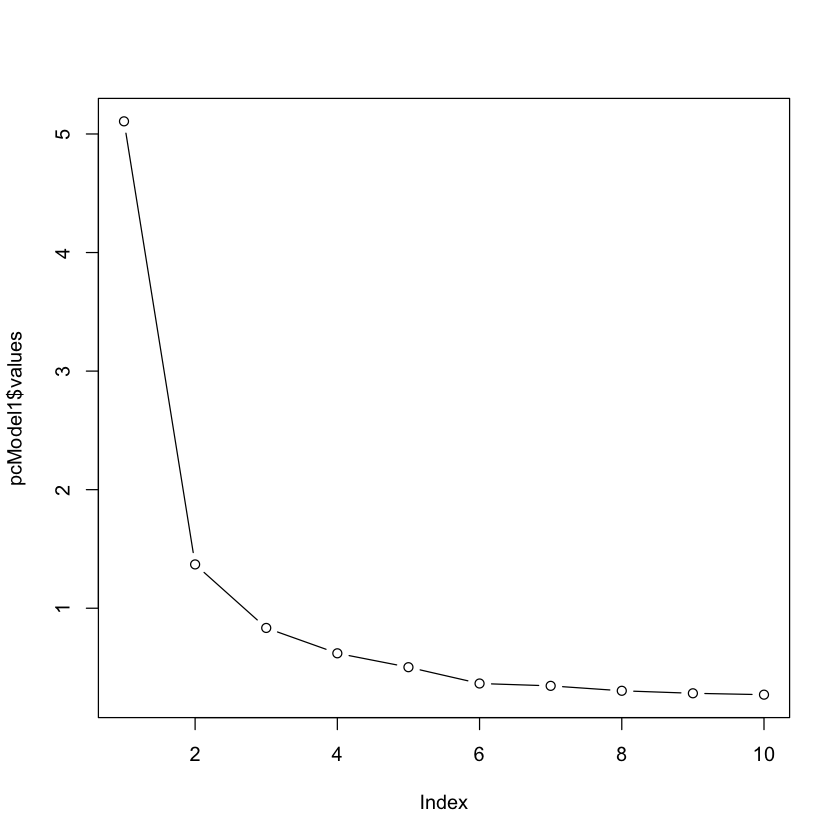

In [16]:
## Based on teh SS Loadings, there are probably 2 factors here 
### Examine the scree plot
plot(pcModel1$values, type="b")
### It confirms 2

In [17]:
pcModel2 <- principal(FWB1, nfactors = 2, rotate = "none") 
pcModel2
## Examine the residuals. It's a good fit if it is less than 50%
residuals <- factor.residuals(FWBmatrix, pcModel2$loadings) 
residuals <- as.matrix(residuals[upper.tri(residuals)]) 
largeResid <- abs(residuals) > .05
sum(largeResid)
sum(largeResid/nrow(residuals))
### Rotation and interpretation and cut


Principal Components Analysis
Call: principal(r = FWB1, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   h2   u2 com
FS1_1  0.84 -0.02 0.70 0.30 1.0
FS1_2  0.75  0.04 0.57 0.43 1.0
FS1_3  0.80 -0.25 0.70 0.30 1.2
FS1_4  0.83 -0.18 0.72 0.28 1.1
FS1_5  0.77 -0.21 0.64 0.36 1.2
FS1_6  0.75  0.08 0.57 0.43 1.0
FS1_7  0.79  0.02 0.62 0.38 1.0
FS2_1  0.54  0.61 0.67 0.33 2.0
FS2_2  0.53  0.67 0.73 0.27 1.9
FS2_3 -0.40  0.63 0.56 0.44 1.7

                       PC1  PC2
SS loadings           5.11 1.37
Proportion Var        0.51 0.14
Cumulative Var        0.51 0.65
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.08 
 with the empirical chi square  3515.18  with prob <  0 

Fit based upon off diagonal values = 0.97

[1] 30

[1] 0.6666667

In [22]:
### But try 3 also because it was > 50%
pcModel3 <- principal(FWB1, nfactors = 3, rotate = "none") 
pcModel3
residuals <- factor.residuals(FWBmatrix, pcModel3$loadings) 
residuals <- as.matrix(residuals[upper.tri(residuals)]) 
largeResid <- abs(residuals) > .05
sum(largeResid)
sum(largeResid/nrow(residuals))


Principal Components Analysis
Call: principal(r = FWB1, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
        PC1   PC2   PC3   h2   u2 com
FS1_1  0.84 -0.02  0.24 0.76 0.24 1.2
FS1_2  0.75  0.04 -0.12 0.58 0.42 1.1
FS1_3  0.80 -0.25 -0.16 0.73 0.27 1.3
FS1_4  0.83 -0.18 -0.08 0.73 0.27 1.1
FS1_5  0.77 -0.21 -0.24 0.69 0.31 1.4
FS1_6  0.75  0.08  0.47 0.80 0.20 1.7
FS1_7  0.79  0.02  0.43 0.81 0.19 1.6
FS2_1  0.54  0.61 -0.26 0.74 0.26 2.3
FS2_2  0.53  0.67 -0.28 0.81 0.19 2.3
FS2_3 -0.40  0.63  0.33 0.67 0.33 2.3

                       PC1  PC2  PC3
SS loadings           5.11 1.37 0.83
Proportion Var        0.51 0.14 0.08
Cumulative Var        0.51 0.65 0.73
Proportion Explained  0.70 0.19 0.11
Cumulative Proportion 0.70 0.89 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  2353.55  with prob <  0 

Fit

[1] 15

[1] 0.3333333

In [25]:
### That actually looks much betier - so you may want to interpret with 2 or with 3 
print.psych(pcModel3, cut = .3, sort=TRUE)

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 3, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PC1   PC2   PC3   h2   u2 com
FS1_1    1  0.84             0.76 0.24 1.2
FS1_4    4  0.83             0.73 0.27 1.1
FS1_3    3  0.80             0.73 0.27 1.3
FS1_7    7  0.79        0.43 0.81 0.19 1.6
FS1_5    5  0.77             0.69 0.31 1.4
FS1_2    2  0.75             0.58 0.42 1.1
FS1_6    6  0.75        0.47 0.80 0.20 1.7
FS2_2    9  0.53  0.67       0.81 0.19 2.3
FS2_3   10 -0.40  0.63  0.33 0.67 0.33 2.3
FS2_1    8  0.54  0.61       0.74 0.26 2.3

                       PC1  PC2  PC3
SS loadings           5.11 1.37 0.83
Proportion Var        0.51 0.14 0.08
Cumulative Var        0.51 0.65 0.73
Proportion Explained  0.70 0.19 0.11
Cumulative Proportion 0.70 0.89 1.00

Mean item complexity =  1.6
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with 

In [26]:
print.psych(pcModel2, cut = .3, sort=TRUE)

Principal Components Analysis
Call: principal(r = FWB1, nfactors = 2, rotate = "none")
Standardized loadings (pattern matrix) based upon correlation matrix
      item   PC1   PC2   h2   u2 com
FS1_1    1  0.84       0.70 0.30 1.0
FS1_4    4  0.83       0.72 0.28 1.1
FS1_3    3  0.80       0.70 0.30 1.2
FS1_7    7  0.79       0.62 0.38 1.0
FS1_5    5  0.77       0.64 0.36 1.2
FS1_2    2  0.75       0.57 0.43 1.0
FS1_6    6  0.75       0.57 0.43 1.0
FS2_2    9  0.53  0.67 0.73 0.27 1.9
FS2_3   10 -0.40  0.63 0.56 0.44 1.7
FS2_1    8  0.54  0.61 0.67 0.33 2.0

                       PC1  PC2
SS loadings           5.11 1.37
Proportion Var        0.51 0.14
Cumulative Var        0.51 0.65
Proportion Explained  0.79 0.21
Cumulative Proportion 0.79 1.00

Mean item complexity =  1.3
Test of the hypothesis that 2 components are sufficient.

The root mean square of the residuals (RMSR) is  0.08 
 with the empirical chi square  3515.18  with prob <  0 

Fit based upon off diagonal values = 0.97

In [27]:
#### Try with some different rotations
pcModel4 <- principal(FWB2, nfactors = 3, rotate = "oblimin") 
print.psych(pcModel4, cut=.3, sort=FALSE)

Principal Components Analysis
Call: principal(r = FWB2, nfactors = 3, rotate = "oblimin")
Standardized loadings (pattern matrix) based upon correlation matrix
        TC1   TC3   TC2   h2   u2 com
FS1_1        0.65       0.76 0.24 1.4
FS1_2  0.59             0.60 0.40 1.4
FS1_3  0.87             0.77 0.23 1.0
FS1_4  0.77             0.77 0.23 1.1
FS1_5  0.93             0.77 0.23 1.0
FS1_6        0.95       0.83 0.17 1.0
FS1_7        0.87       0.81 0.19 1.0
FS2_1              0.87 0.78 0.22 1.0
FS2_2              0.91 0.82 0.18 1.0

                       TC1  TC3  TC2
SS loadings           2.87 2.33 1.71
Proportion Var        0.32 0.26 0.19
Cumulative Var        0.32 0.58 0.77
Proportion Explained  0.41 0.34 0.25
Cumulative Proportion 0.41 0.75 1.00

 With component correlations of 
     TC1  TC3  TC2
TC1 1.00 0.62 0.38
TC3 0.62 1.00 0.41
TC2 0.38 0.41 1.00

Mean item complexity =  1.1
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RM

In [28]:
pcModel5 <- principal(FWB2, nfactors = 3, rotate = "varimax") 
print.psych(pcModel5, cut=.3, sort=FALSE)

Principal Components Analysis
Call: principal(r = FWB2, nfactors = 3, rotate = "varimax")
Standardized loadings (pattern matrix) based upon correlation matrix
       RC1  RC3  RC2   h2   u2 com
FS1_1 0.49 0.69      0.76 0.24 2.0
FS1_2 0.63 0.31 0.34 0.60 0.40 2.1
FS1_3 0.82           0.77 0.23 1.3
FS1_4 0.78 0.38      0.77 0.23 1.5
FS1_5 0.84           0.77 0.23 1.2
FS1_6      0.86      0.83 0.17 1.3
FS1_7 0.34 0.82      0.81 0.19 1.4
FS2_1           0.85 0.78 0.22 1.2
FS2_2           0.87 0.82 0.18 1.1

                       RC1  RC3  RC2
SS loadings           2.86 2.31 1.75
Proportion Var        0.32 0.26 0.19
Cumulative Var        0.32 0.57 0.77
Proportion Explained  0.41 0.33 0.25
Cumulative Proportion 0.41 0.75 1.00

Mean item complexity =  1.4
Test of the hypothesis that 3 components are sufficient.

The root mean square of the residuals (RMSR) is  0.06 
 with the empirical chi square  1563.67  with prob <  0 

Fit based upon off diagonal values = 0.99